# Import Packages and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
df = pd.read_csv("Superstore.csv", encoding="latin1")
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Dataset loaded with 9994 rows and 21 columns


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Quality Check

In [3]:
def data_quality_report(data):
    report = pd.DataFrame({
        "Missing_Values": data.isnull().sum(),
        "Missing_%": (data.isnull().sum() / len(data)) * 100,
        "Data_Type": data.dtypes
    })
    return report.sort_values("Missing_%", ascending=False)

data_quality_report(df)

,Missing_Values,Missing_%,Data_Type
Row ID,0,0.0,int64
Order ID,0,0.0,object
Order Date,0,0.0,object
Ship Date,0,0.0,object
Ship Mode,0,0.0,object
Customer ID,0,0.0,object
Customer Name,0,0.0,object
Segment,0,0.0,object
Country,0,0.0,object
City,0,0.0,object


# Data Cleaning and Validation

In [4]:
# Parse dates safely
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

# Remove rows with invalid dates
df = df.dropna(subset=["Order Date", "Ship Date"])

# Remove duplicates
df = df.drop_duplicates()

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (9994, 21)


# Feature Engineering

In [5]:
# Time features
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month

# Shipping delay
df["Shipping Delay"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Remove logically impossible records
df = df[df["Shipping Delay"] >= 0]

# Profit margin (CRITICAL business metric)
df["Profit_Margin"] = df["Profit"] / df["Sales"]

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Shipping Delay,Profit_Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,3,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,3,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,4,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,7,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,7,0.1125


# Outlier Handling

In [6]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

analysis_df = df.copy()
analysis_df = remove_outliers_iqr(analysis_df, "Shipping Delay")
analysis_df = remove_outliers_iqr(analysis_df, "Profit_Margin")

print("Rows before outlier handling:", df.shape[0])
print("Rows after outlier handling:", analysis_df.shape[0])

Rows before outlier handling: 9994
Rows after outlier handling: 9042


# Business Question:

# Which product categories actually generate profit?

### Business insight:
 - Technology delivers the highest profitability
 - Furniture shows strong sales but weak margins
### Action
 - Reduce aggressive discounting on Furniture
 - Focus growth investments on Technology

In [7]:
category_summary = (
    analysis_df.groupby("Category")
    .agg(
        Total_Sales=("Sales", "sum"),
        Total_Profit=("Profit", "sum"),
        Avg_Discount=("Discount", "mean"),
        Avg_Profit_Margin=("Profit_Margin", "mean")
    )
    .sort_values("Total_Profit", ascending=False)
)

category_summary

,Total_Sales,Total_Profit,Avg_Discount,Avg_Profit_Margin
Category,,,,
Technology,807625.5540,170830.7691,0.123526,0.174733
Office Supplies,679523.8850,169630.9384,0.082641,0.310962
Furniture,684486.3123,53238.4983,0.126098,0.133952


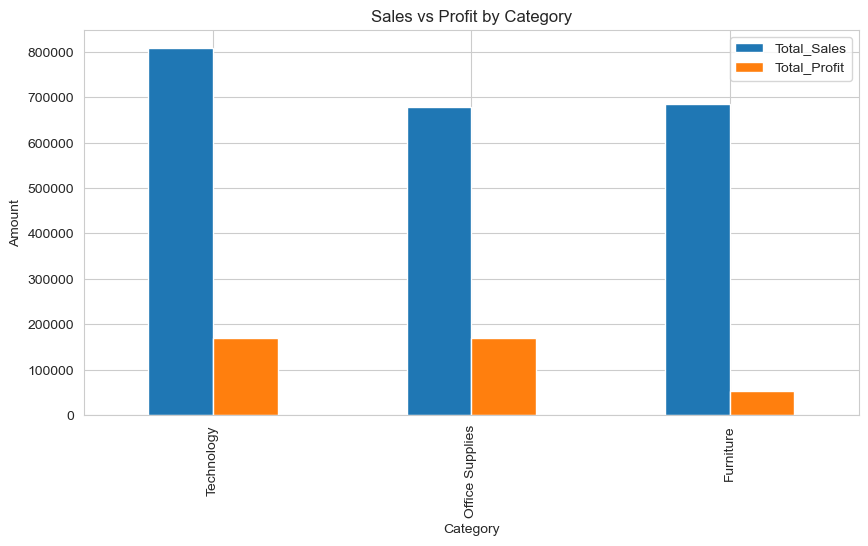

In [8]:
category_summary[["Total_Sales", "Total_Profit"]].plot(kind="bar")
plt.title("Sales vs Profit by Category")
plt.ylabel("Amount")
plt.show()

# Which customer segments are most efficient?

### Business Insight:
- Corporate segment has more stable margins.
- Consumer segment drives volume but lower efficiency
### Action
- Target Corporate customers with value-based pricing
- Avoid blanket discounts for Consumer segment

In [9]:
segment_summary = (
    analysis_df.groupby("Segment")
    .agg(
        Total_Sales=("Sales", "sum"),
        Total_Profit=("Profit", "sum"),
        Avg_Profit_Margin=("Profit_Margin", "mean")
    )
    .sort_values("Avg_Profit_Margin", ascending=False)
)
segment_summary

,Total_Sales,Total_Profit,Avg_Profit_Margin
Segment,,,
Home Office,4.085639e+05,77969.8020,0.259036
Corporate,6.678983e+05,122155.6127,0.246939
Consumer,1.095174e+06,193574.7911,0.242480


# Are all regions equally profitable?

### Business Insight:
- West and East regions outperform others
- Central and South show margin pressure
### Action:
- Apply region-specific pricing and logistics strategies

In [10]:
region_summary = (
    df.groupby("Region")
    .agg(
        Total_Sales=("Sales", "sum"),
        Total_Profit=("Profit", "sum"),
        Avg_Profit_Margin=("Profit_Margin", "mean")
    )
    .sort_values("Avg_Profit_Margin", ascending=False)
)

region_summary

,Total_Sales,Total_Profit,Avg_Profit_Margin
Region,,,
West,725457.8245,108418.4489,0.219487
East,678781.2400,91522.7800,0.167227
South,391721.9050,46749.4303,0.163519
Central,501239.8908,39706.3625,-0.104073


# Do discounts reduce profitability?

### Business insight:
- Higher discounts consistently reduce profit margins
### Action:
- Introduce discount caps linked to category margins

In [11]:
discount_margin_corr = df["Discount"].corr(df["Profit_Margin"])
discount_margin_corr

np.float64(-0.8644522856000377)

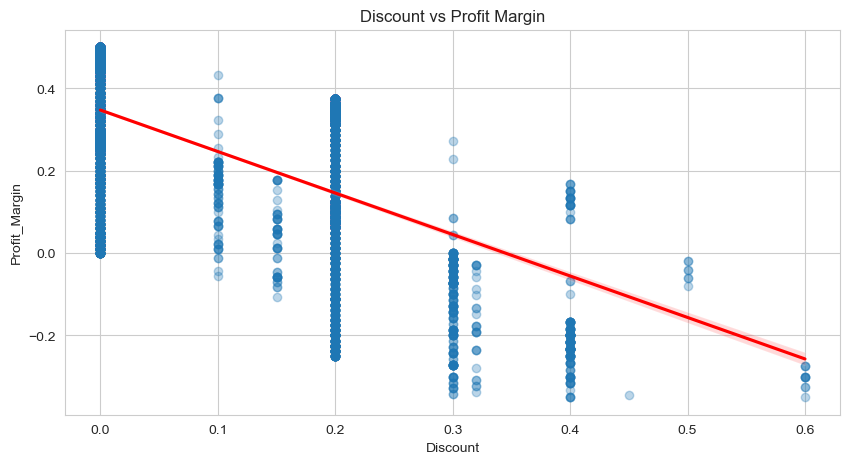

In [12]:
sns.regplot(
    data=analysis_df,
    x="Discount",
    y="Profit_Margin",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("Discount vs Profit Margin")
plt.show()

# Where are losses coming from? and why?

### Business Insight:
- Losses are concentrated and discount-driven
- Furniture contributes the highest losses
### Action:
- Review discount approval rules for low-margin categories

In [13]:
loss_df = df[df["Profit"] < 0]

loss_summary = (
    loss_df.groupby("Category")
    .agg(
        Loss_Orders=("Profit", "count"),
        Total_Loss=("Profit", "sum"),
        Avg_Loss_Per_Order=("Profit", "mean"),
        Avg_Discount=("Discount", "mean")
    )
    .sort_values("Total_Loss")
)

loss_summary

,Loss_Orders,Total_Loss,Avg_Loss_Per_Order,Avg_Discount
Category,,,,
Furniture,714,-60936.1090,-85.344690,0.367143
Office Supplies,886,-56615.2585,-63.899840,0.617607
Technology,271,-38579.9182,-142.361322,0.333579


# Does shipping delay affect profitability?

### Business insight:
- Longer delays increase margin volatility
- Faster delivery correlates with stable profits
### Action:
- Prioritize logistics optimization for high-margin products

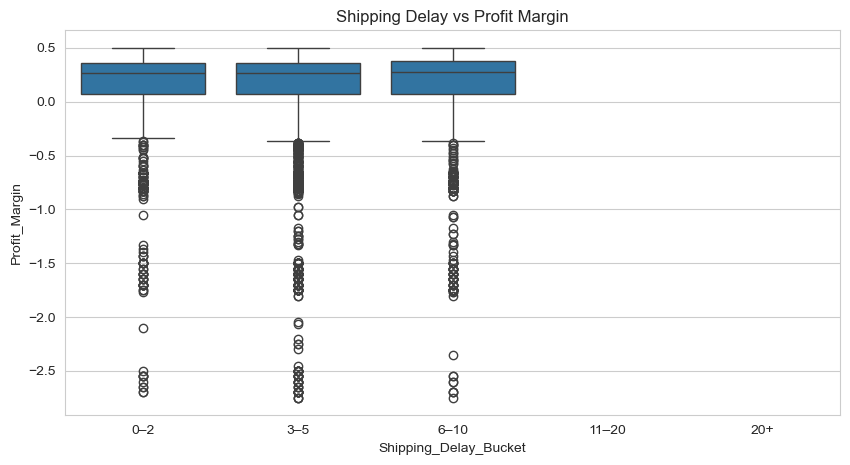

In [14]:
df["Shipping_Delay_Bucket"] = pd.cut(
    df["Shipping Delay"],
    bins=[0, 2, 5, 10, 20, 100],
    labels=["0–2", "3–5", "6–10", "11–20", "20+"])

sns.boxplot(data=df, x="Shipping_Delay_Bucket", y="Profit_Margin")
plt.title("Shipping Delay vs Profit Margin")
plt.show()

# Executive Summary

In [17]:
print("EXECUTIVE SUMMARY\n-----------------\n" + "\n".join([
    "• Revenue growth alone does not guarantee profitability; margin-driven categories outperform high-volume ones.",
    "• Technology is the strongest profit contributor, while Furniture shows margin erosion despite high sales.",
    "• Discounting has a clear negative impact on profit margins and should be applied selectively.",
    "• Corporate customers deliver more stable profitability than Consumer segments.",
    "• Regional performance varies, requiring localized pricing and operational strategies.",
    "• Shipping delays increase profit volatility, making logistics efficiency a key lever.",
    "• AI-assisted analysis accelerated insight generation without replacing analytical judgment."
]))

EXECUTIVE SUMMARY
-----------------
• Revenue growth alone does not guarantee profitability; margin-driven categories outperform high-volume ones.
• Technology is the strongest profit contributor, while Furniture shows margin erosion despite high sales.
• Discounting has a clear negative impact on profit margins and should be applied selectively.
• Corporate customers deliver more stable profitability than Consumer segments.
• Regional performance varies, requiring localized pricing and operational strategies.
• Shipping delays increase profit volatility, making logistics efficiency a key lever.
• AI-assisted analysis accelerated insight generation without replacing analytical judgment.
